# 1) Dataset Walkthrough
## 1.1) Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## 1.2) Loading Dataset

In [2]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 1.3) Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## 1.4) Checking Null Values

In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## 1.5) Removing  Product Category 2 & 3 Columns

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

## 1.6) Checking Uniques values per Column

In [6]:
for i in df.columns:
    print(i,":",df[i].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


# Assumptions

1. Who is more likely to spend more on Black Friday i.e Man/Woman, Married/Unmarried, What age group
2. What type of products people purchase more i.e Category 1, 2 or 3
3. Who spent more i.e Old/New customer
4. From which area people spend more
5. From what type of occupation people spend more

## 2.1) Analysing Gender Column


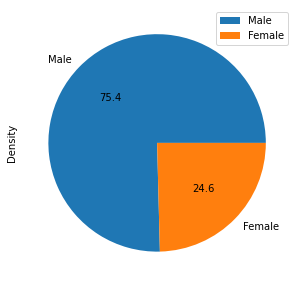

In [7]:
data = pd.DataFrame({'Density': [len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]},
                  index=['Male', 'Female'])
                              
plot = data.plot.pie(y='Density', figsize=(5, 5), autopct = '%.1f')

<AxesSubplot:title={'center':'Gender Chart'}, ylabel='None'>

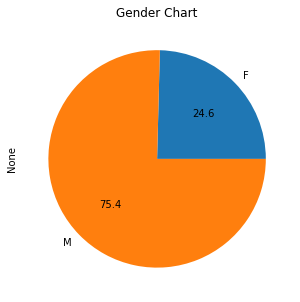

In [8]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'Gender Chart', 
                                 figsize = (5,5))

<AxesSubplot:title={'center':'Gender Chart'}, xlabel='Gender'>

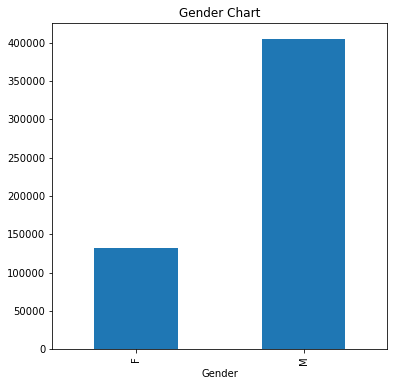

In [9]:
df.groupby('Gender').size().plot(kind = 'bar', figsize = (6,6), title = 'Gender Chart')

## 2.2) Average Amount Spend per Product by Gender

In [10]:
print('Female  : ' , round(df[df['Gender']=='F']['Purchase'].sum()/len(df[df['Gender']=='F']),2))
print('Male    : ' , round(df[df['Gender']=='M']['Purchase'].sum()/len(df[df['Gender']=='M']),2))

f = round(df[df['Gender']=='F']['Purchase'].sum()/len(df[df['Gender']=='F']),2)
m = round(df[df['Gender']=='M']['Purchase'].sum()/len(df[df['Gender']=='M']),2)

Female  :  8809.76
Male    :  9504.77


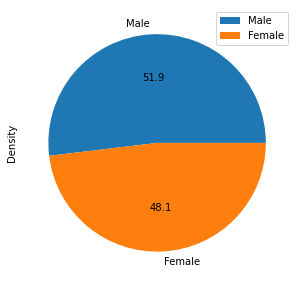

In [11]:
data = pd.DataFrame({'Density': [m,f]},
                    index=['Male', 'Female'])
                              
plot = data.plot.pie(y='Density', figsize=(5, 5), autopct = '%.1f')

## 2.3) Analysing Product Distribution based on Age

<AxesSubplot:title={'center':'Age Chart'}, xlabel='Age'>

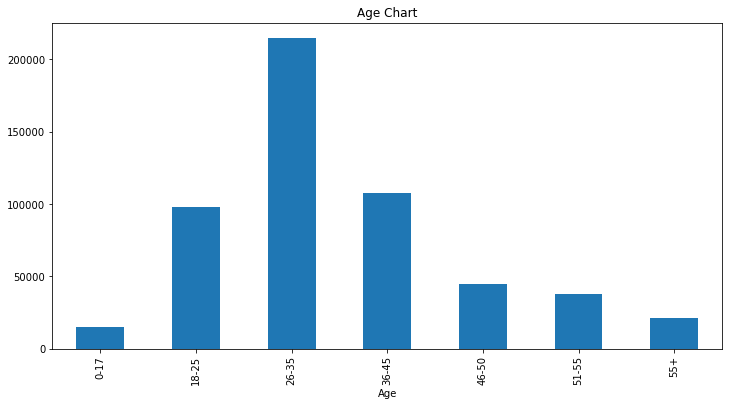

In [12]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12,6), title = 'Age Chart')

## 2.4) Analysing Unique Products Purchased based on Age

<AxesSubplot:xlabel='Age'>

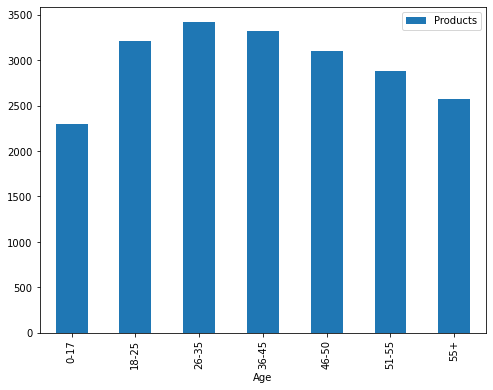

In [13]:
lst = []

for i in df['Age'].unique():
    lst.append([i,len(df[df['Age'] == i]['Product_ID'].unique())])
    
    
data = pd.DataFrame(lst, columns = ['Age', 'Products']).sort_values(by = 'Age')
data.plot.bar(x = 'Age', y = 'Products', figsize=(8, 6))

## 2.5) Analysing Amount spend by Age

<AxesSubplot:xlabel='Age'>

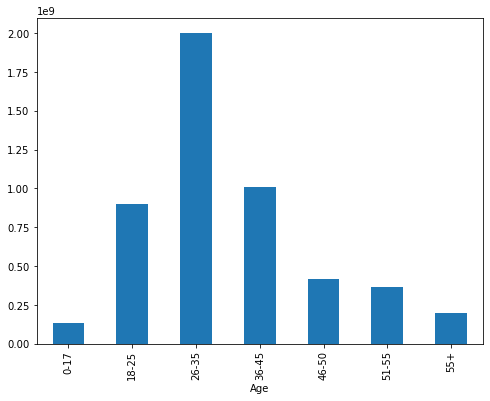

In [14]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (8,6))

## 2.6) Average Amount spend by Age

<AxesSubplot:xlabel='Age'>

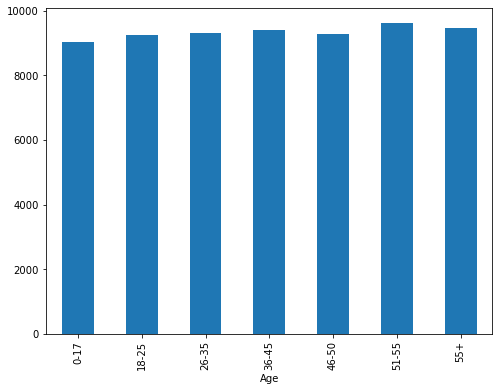

In [15]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (8,6))

## 2.7) Analysing Marital Status Distribution

<AxesSubplot:title={'center':'Marital Status'}, ylabel='None'>

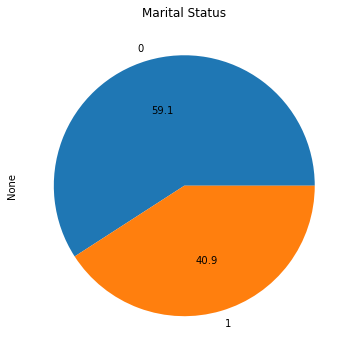

In [16]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'Marital Status', 
                                 figsize = (6,6))

## 2.8) Analyse Purchase by Age WRT Gender

<AxesSubplot:xlabel='Age', ylabel='count'>

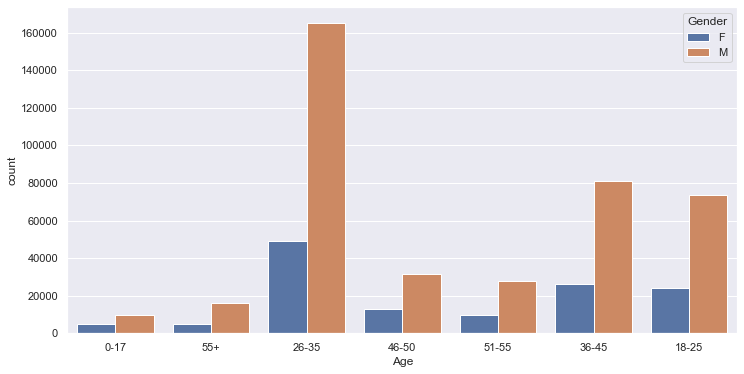

In [17]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(x = 'Age', hue = 'Gender', data = df)

## 2.9) Analyse Purchase by Marital Status WRT Gender

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

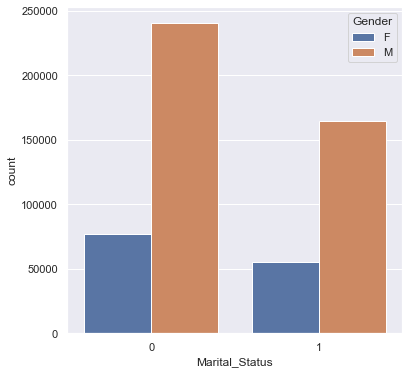

In [18]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(x = 'Marital_Status', hue = 'Gender', data = df)

## 2.10) Analyse Purchase based on City Category

<AxesSubplot:xlabel='City_Category', ylabel='count'>

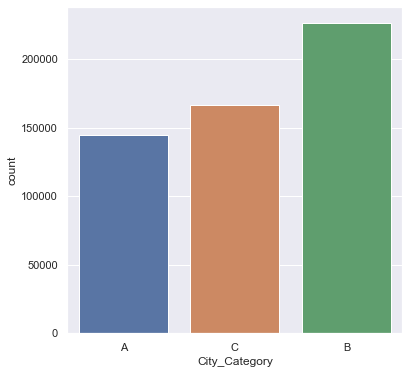

In [19]:
sns.countplot(x = df['City_Category'])

<AxesSubplot:title={'center':'City Category'}, ylabel='None'>

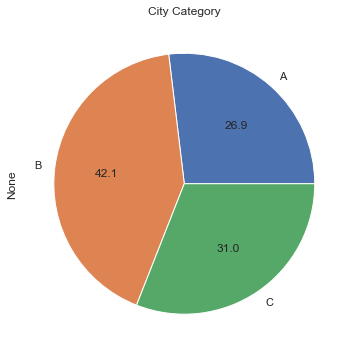

In [20]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'City Category', 
                                 figsize = (6,6))

## 2.11) Analyse Purchase by City Category WRT Gender

<AxesSubplot:xlabel='City_Category', ylabel='count'>

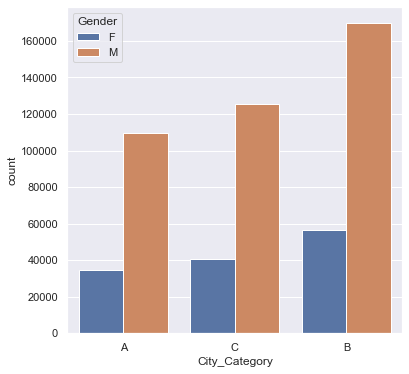

In [21]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

## 2.12) Total Amount Spend on products by City Category

<AxesSubplot:title={'center':'City Category'}, ylabel='Purchase'>

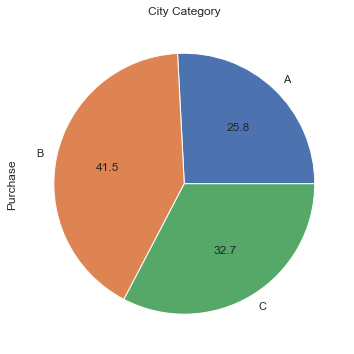

In [22]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'City Category', 
                                 figsize = (6,6))

## 2.13) Average amount spend on products by City Category

<AxesSubplot:title={'center':'City Category'}, ylabel='Purchase'>

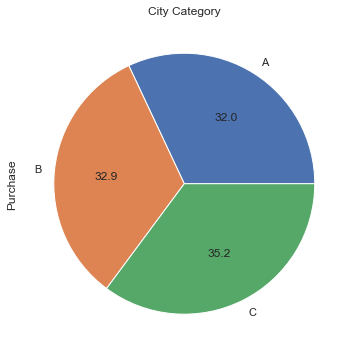

In [23]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'City Category', 
                                 figsize = (6,6))

## 2.14) Analyse Purchase by City Category

<AxesSubplot:xlabel='City_Category', ylabel='count'>

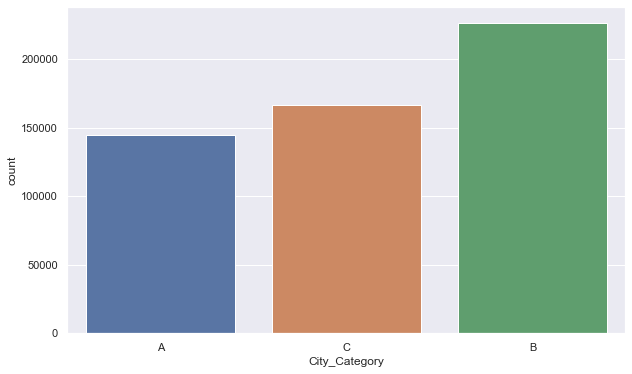

In [24]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x = df['City_Category'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

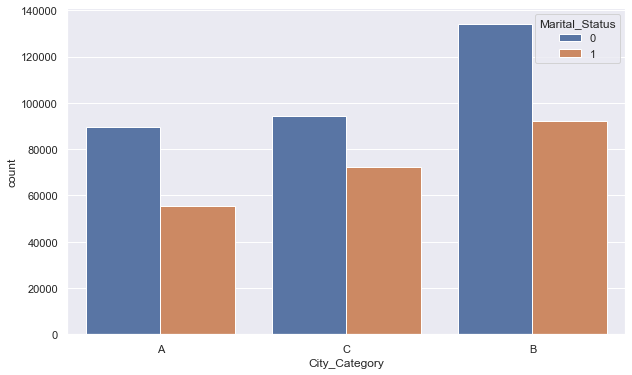

In [25]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x = 'City_Category', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

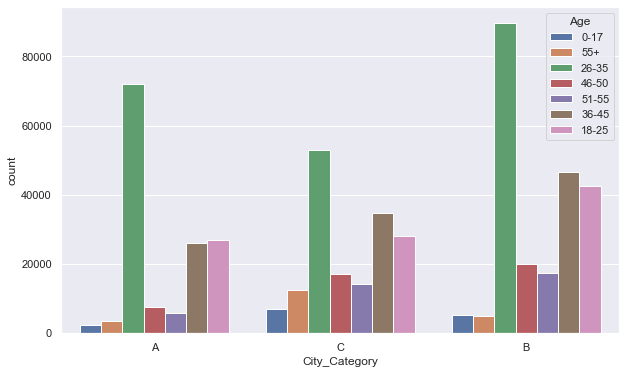

In [26]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x = df['City_Category'], hue=df['Age'])

## 2.15) Analyse Purchase WRT Stay in Current City

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

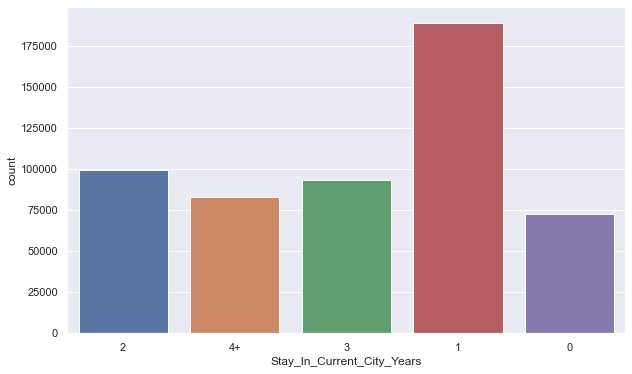

In [27]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

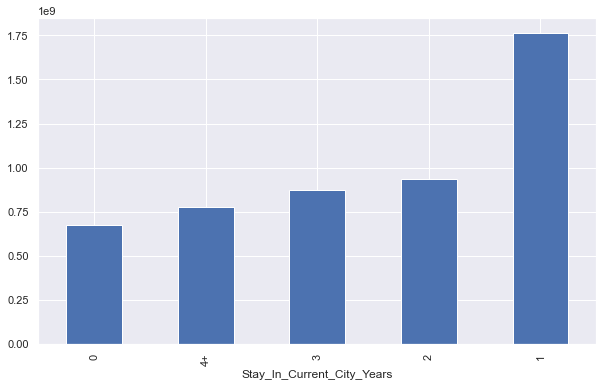

In [28]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:title={'center':'City Category'}, ylabel='Purchase'>

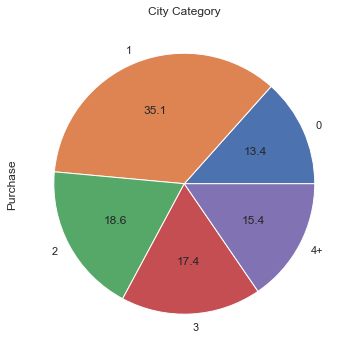

In [29]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f', 
                                 title = 'City Category', 
                                 figsize = (6,6))

## 2.16) Analyse Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

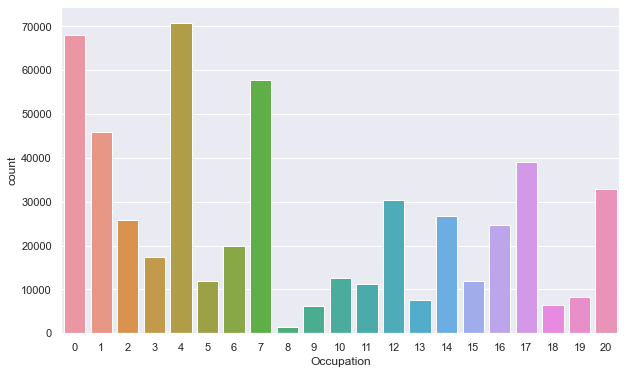

In [30]:
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

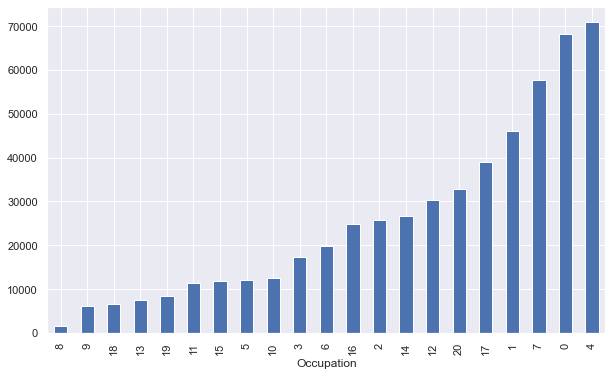

In [31]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

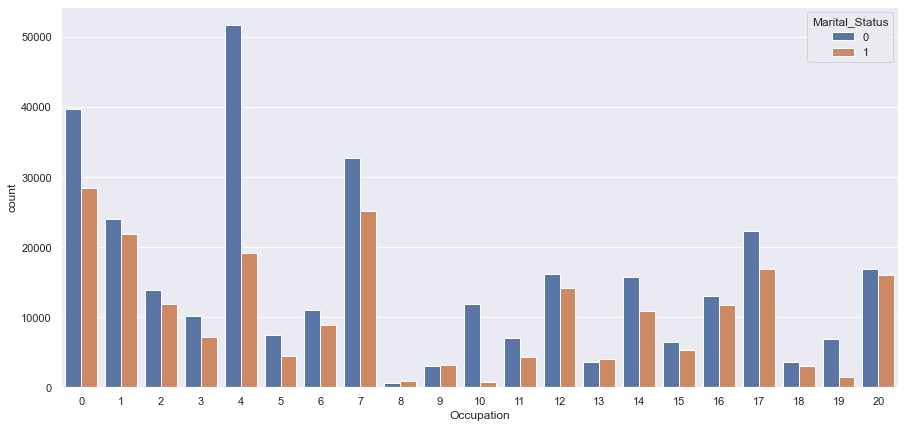

In [32]:
sns.set(rc = {'figure.figsize':(15,7)})

sns.countplot(x = df['Occupation'], hue= df['Marital_Status'])

<AxesSubplot:xlabel='Occupation'>

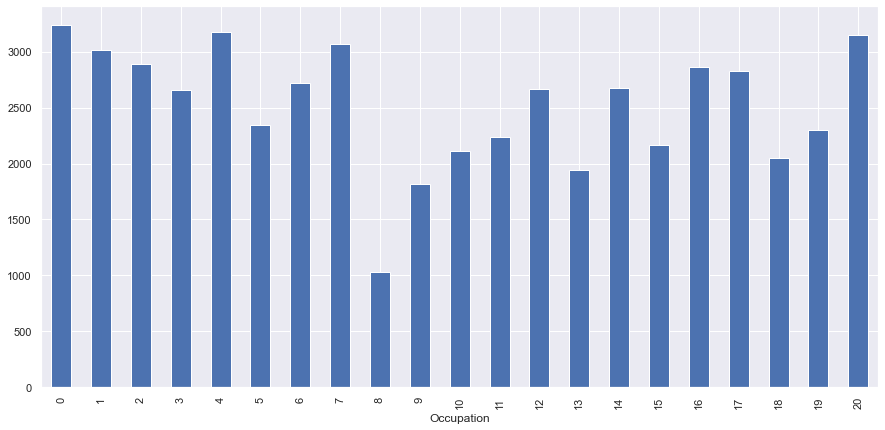

In [33]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

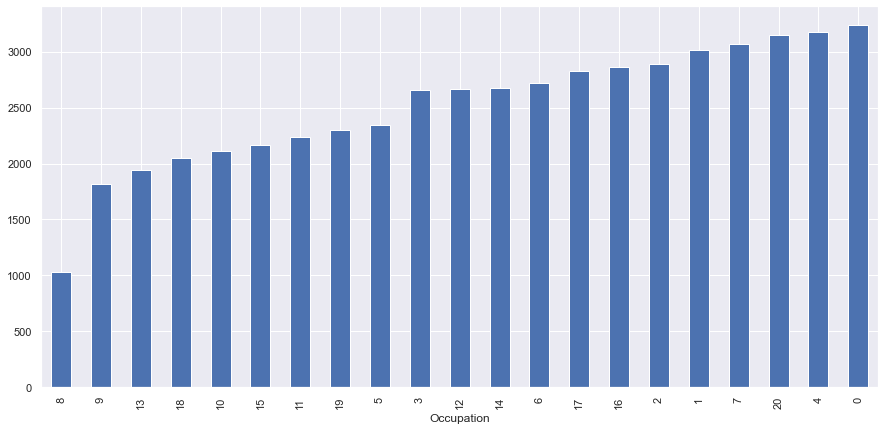

In [34]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

## 2.17) Analyse Product Category

<AxesSubplot:xlabel='Product_Category_1'>

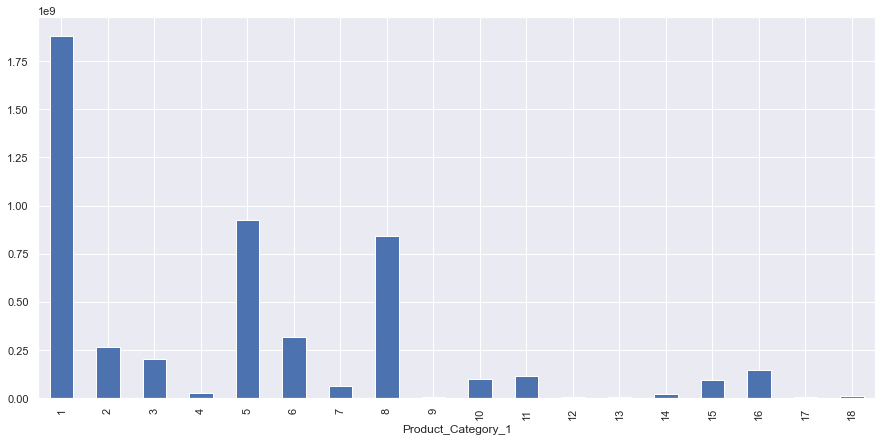

In [35]:
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

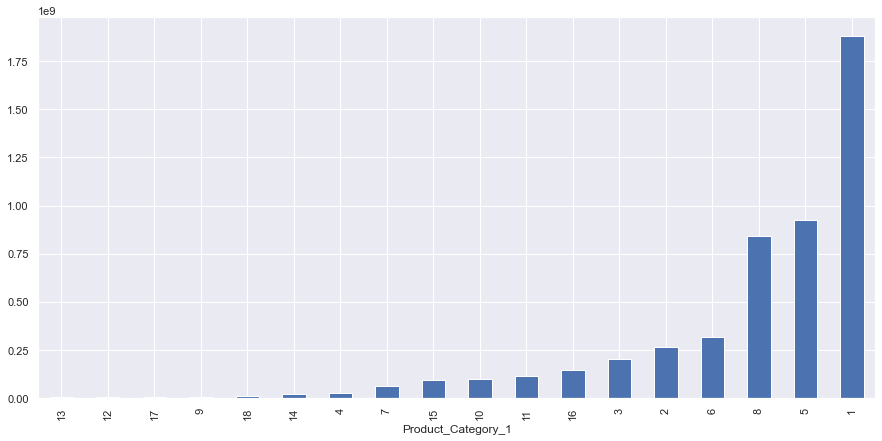

In [36]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

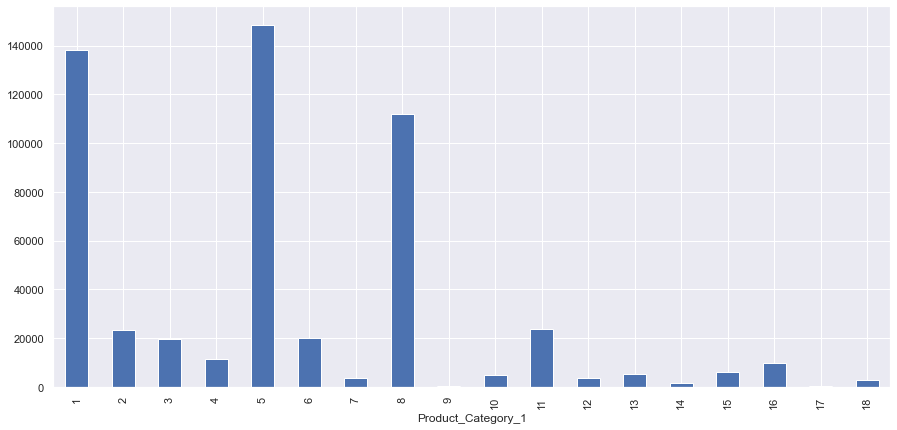

In [37]:
df.groupby('Product_Category_1')['Purchase'].size().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

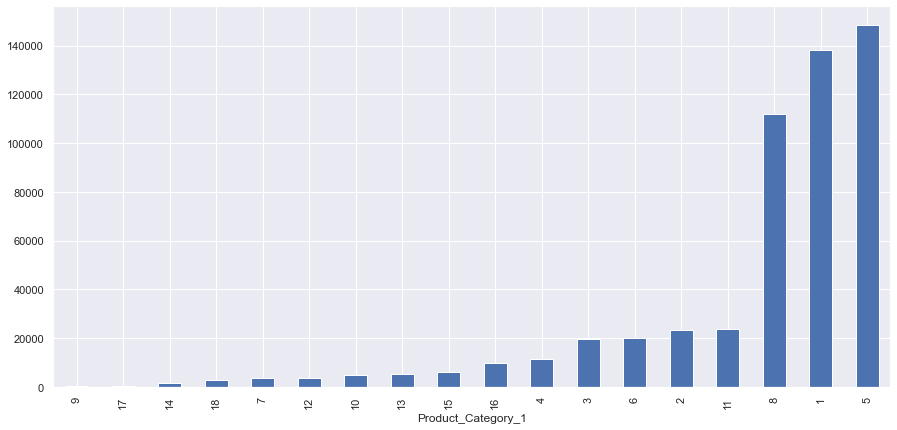

In [38]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

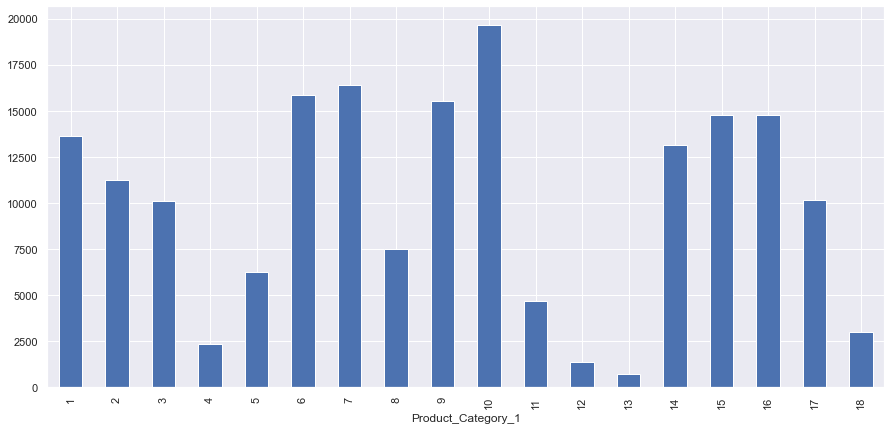

In [39]:
df.groupby('Product_Category_1')['Purchase'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

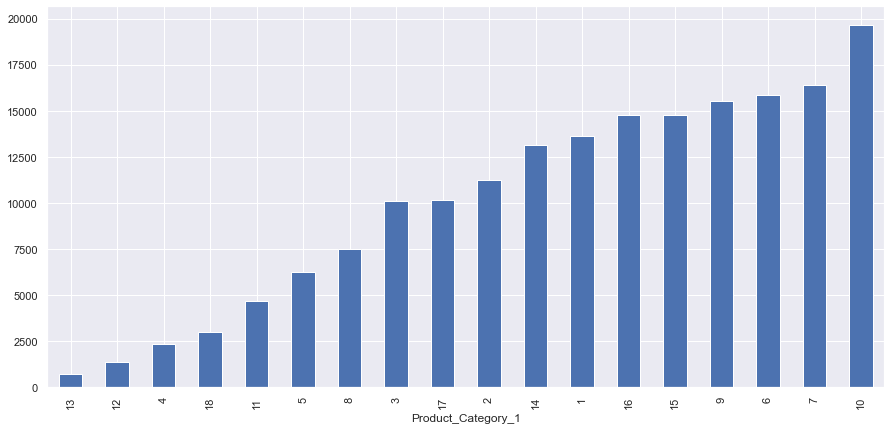

In [40]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

## 2.18) Analyse Product ID

<AxesSubplot:ylabel='Product_ID'>

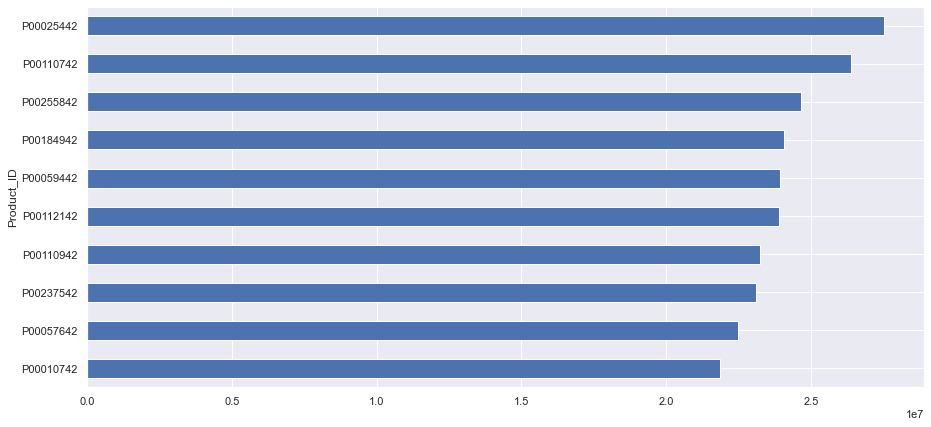

In [41]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='Product_ID'>

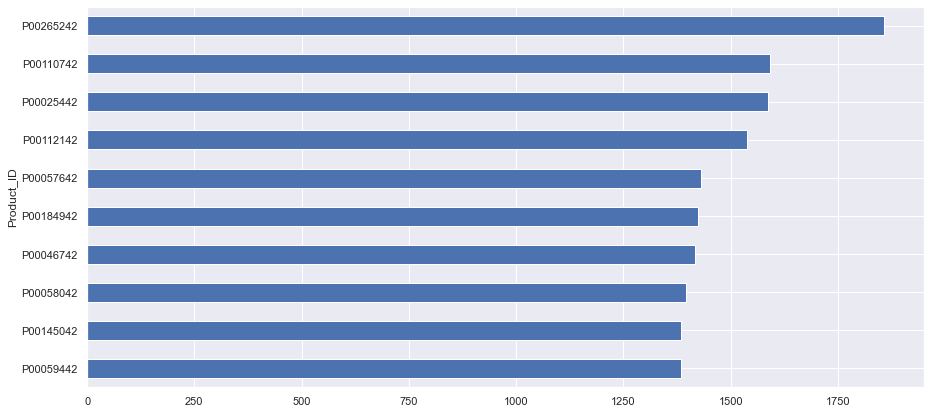

In [42]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'barh')

## 2.19) Combining Marital Status & Gender

In [43]:
l = []

for i in range(len(df)):
    l.append(str(df['Gender'][i]) +"_"+ str(df['Marital_Status'][i]))
    
df['MarritalGender'] = l

In [44]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MarritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MarritalGender', ylabel='count'>

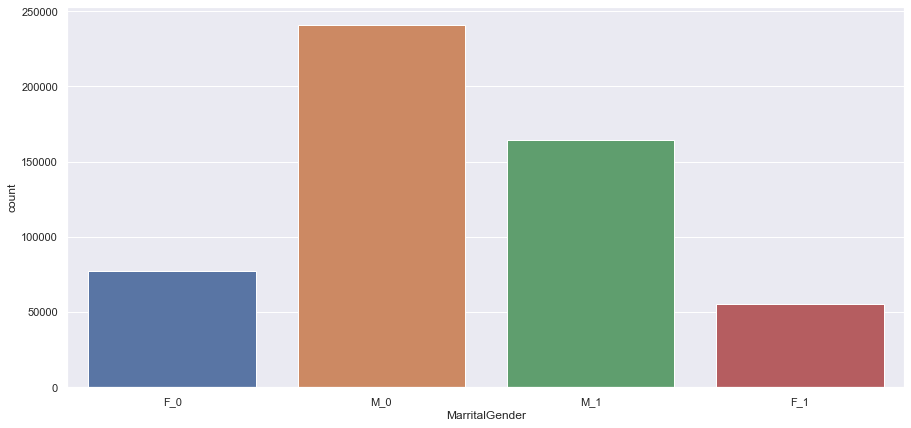

In [45]:
sns.countplot(x = df['MarritalGender'])

## 2.20) Advance Analysis Marital + Gender Combined Column

<AxesSubplot:xlabel='Age', ylabel='count'>

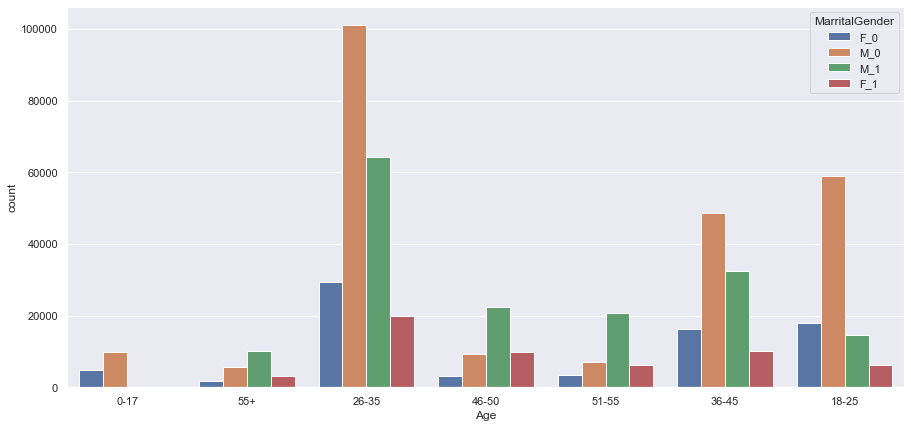

In [46]:
sns.countplot(x = df['Age'],hue=df['MarritalGender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

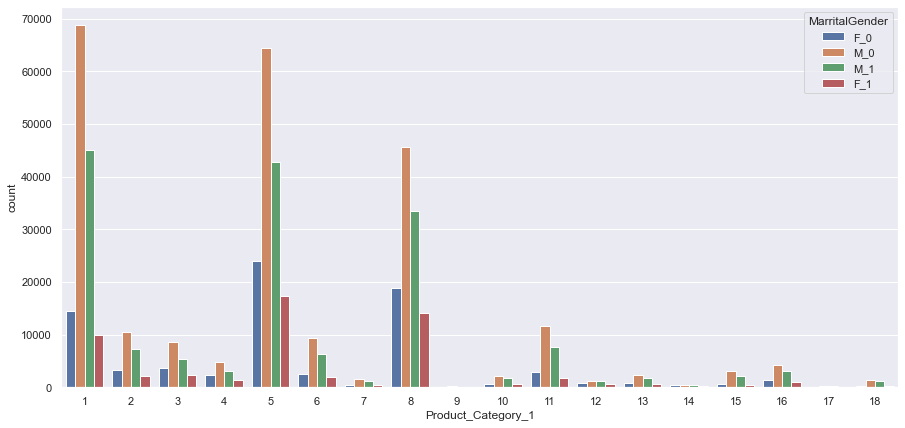

In [47]:
sns.countplot(x = df['Product_Category_1'],hue=df['MarritalGender'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

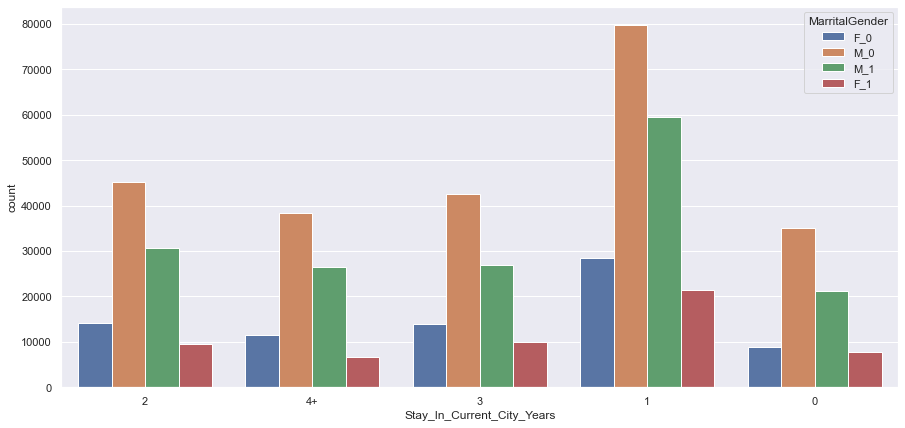

In [48]:
sns.countplot(x = df['Stay_In_Current_City_Years'],hue=df['MarritalGender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

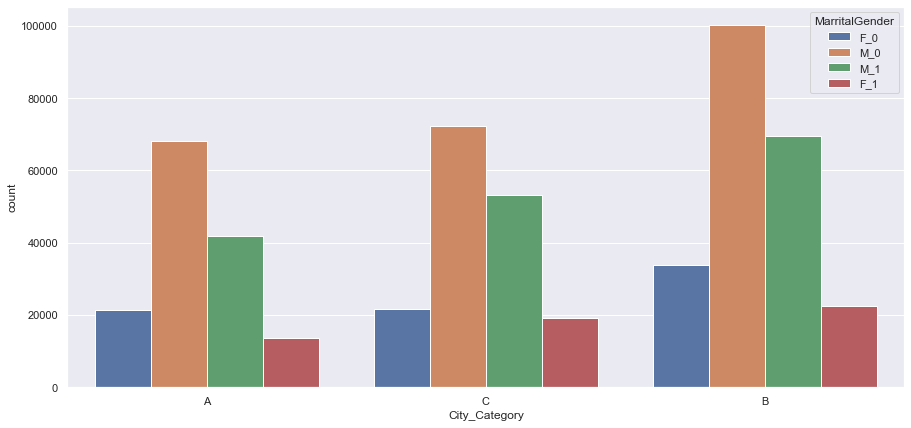

In [49]:
sns.countplot(x = df['City_Category'],hue=df['MarritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

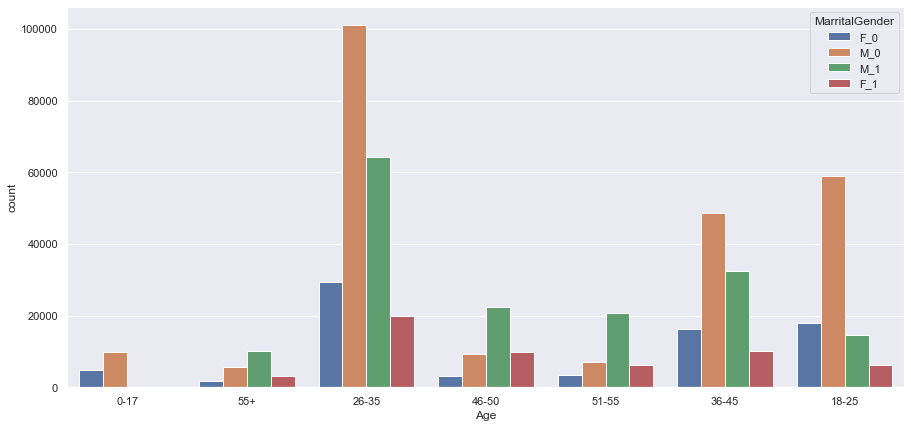

In [50]:
sns.countplot(x = df['Age'],hue=df['MarritalGender'])

In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MarritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


# Conclusion

1. Men are more likely to spend on sales like Black Friday
2. People who are unmarried spend more on Black Friday
3. People of age group 26-35 spend more on Black Friday and kids are less likely to spend money on sales
4. People who are located in C spend more on purcahasing stuff on Black Friday
5. People of occupation type 0,4 and 7 spend more on Black Friday
6. People who are newly shifted in this city spend more on BF and people who are staying as guest in this city spend less on sales
7. Products P00025442 and P00110742 are very demanding
8. Irrespective of occupation the proportion of products being purchased is generic. i.e. category 1, 5 are most bought by customers of any occupation and similary, 13-18 categories are bought in less numbers compared to other products.
